In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu, normaltest
import itertools
import statannot

from statannotations.Annotator import Annotator

In [2]:
df=pd.read_excel(f"./IHC-Quantifizierung/IHC-Quantifizierung Merged 250108.xlsx") #, index_col=0)
mapping = {
    'Azini normal': 'normale Azini',
    'ADM Early': 'frühe ADM',
    'ADM Full': 'späte ADM',
    'ADM MTC': 'MTC'
}
df['pathological annotation'] = df['pathological annotation'].replace(mapping)
df

,marker,image,pathological annotation,positive %
0,Claudin 18,CLDN18 38032.svs,normale Azini,0.0000
1,Claudin 18,CLDN18 38032.svs,normale Azini,0.0000
2,Claudin 18,CLDN18 38032.svs,normale Azini,0.0960
3,Claudin 18,CLDN18 38032.svs,normale Azini,0.0000
4,Claudin 18,CLDN18 926895.svs,normale Azini,0.0000
...,...,...,...,...
395,Keratin 19,CK19 926983.svs,MTC,89.5485
396,Keratin 19,CK19 926983.svs,MTC,86.4620
397,Keratin 19,CK19 926983.svs,MTC,85.8809
398,Keratin 19,CK19 926983.svs,MTC,82.6196


In [3]:
cldn18=df[df["marker"].isin(["Claudin 18"])]
cldn18

,marker,image,pathological annotation,positive %
0,Claudin 18,CLDN18 38032.svs,normale Azini,0.000
1,Claudin 18,CLDN18 38032.svs,normale Azini,0.000
2,Claudin 18,CLDN18 38032.svs,normale Azini,0.096
3,Claudin 18,CLDN18 38032.svs,normale Azini,0.000
4,Claudin 18,CLDN18 926895.svs,normale Azini,0.000
...,...,...,...,...
75,Claudin 18,CLDN18 926991.svs,späte ADM,0.000
76,Claudin 18,CLDN18 926991.svs,MTC,54.360
77,Claudin 18,CLDN18 926991.svs,MTC,73.510
78,Claudin 18,CLDN18 926991.svs,MTC,54.510


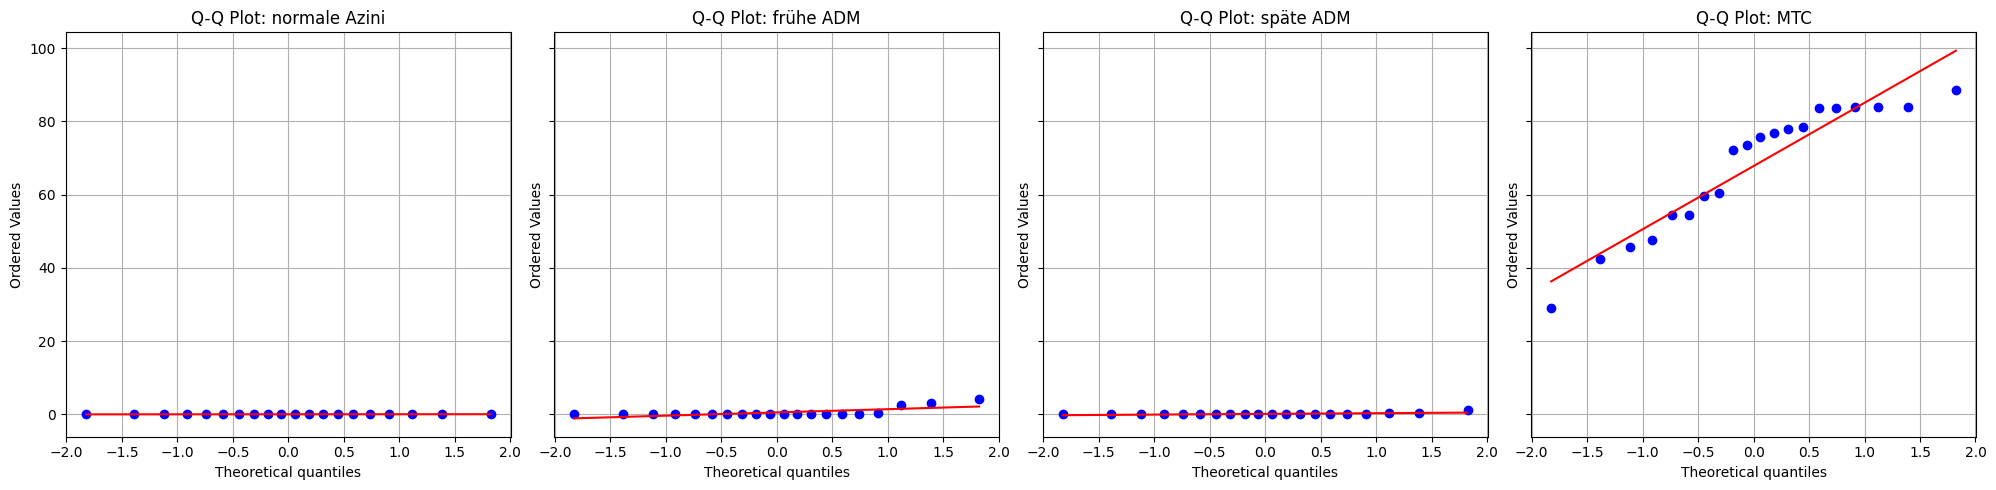

In [4]:
# Plot settings
groups = cldn18["pathological annotation"].unique()
num_groups = len(groups)
fig, axes = plt.subplots(1, num_groups, figsize=(5 * num_groups, 5), sharey=True)

# Generate a Q-Q plot for each group
for i, group in enumerate(groups):
    group_data = cldn18[cldn18["pathological annotation"] == group]["positive %"]
    stats.probplot(group_data, dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {group}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


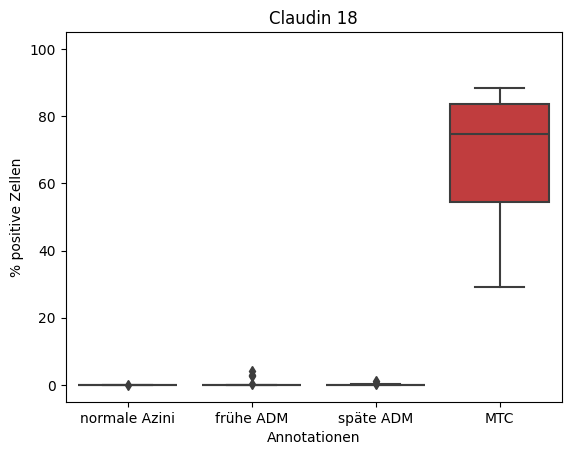

In [7]:
x="pathological annotation"
y="positive %"
order= ["normale Azini", "frühe ADM", "späte ADM", "MTC"]

ax=sns.boxplot(data=cldn18, x=x, y=y, order=order)
ax.set_ylim(-5, 105)
ax.set_ylabel("% positive Zellen")
ax.set_xlabel("Annotationen")

plt.title("Claudin 18")
plt.savefig("./IHC-Quantifizierung/Cldn18_Box_250219.pdf", bbox_inches="tight")
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

späte ADM vs. MTC: t-test independent samples, P_val:7.858e-20 t=-1.756e+01


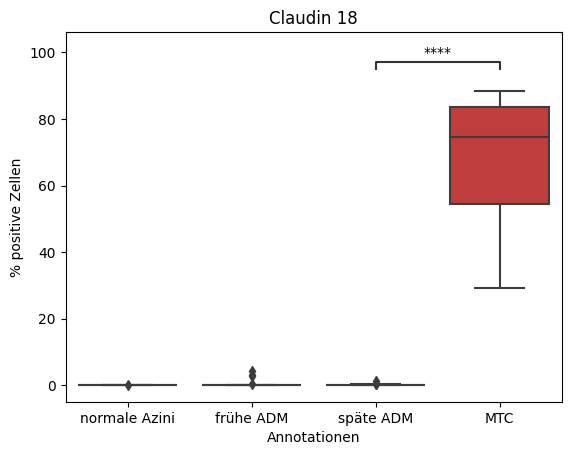

In [8]:
ax = sns.boxplot(data=cldn18, x=x, y=y, order=order)
ax.set_ylim(-5, 105)
ax.set_ylabel("% positive Zellen")
ax.set_xlabel("Annotationen")
annot = Annotator(ax, 
                  [#("normale Azini", "MTC"), 
                   #("normale Azini", "späte ADM"), 
                   #("normale Azini", "frühe ADM"), 
                   #("frühe ADM", "MTC"), 
                   #("frühe ADM", "späte ADM"), 
                   ("späte ADM", "MTC")
                  ], 
                  data=cldn18, x=x, y=y, order=order)
annot.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()

plt.title("Claudin 18")
plt.savefig("./IHC-Quantifizierung/Cldn18_Box_Sign_250219.pdf", bbox_inches="tight")
plt.show()

In [9]:
cldn10=df[df["marker"].isin(["Claudin 10"])]
cldn10

,marker,image,pathological annotation,positive %
160,Claudin 10,Cldn10 38032.svs,normale Azini,91.08
161,Claudin 10,Cldn10 38032.svs,normale Azini,97.66
162,Claudin 10,Cldn10 38032.svs,normale Azini,96.18
163,Claudin 10,Cldn10 38032.svs,normale Azini,95.77
164,Claudin 10,Cldn10 38032.svs,normale Azini,86.11
...,...,...,...,...
235,Claudin 10,Cldn10 926987.svs,MTC,0.00
236,Claudin 10,Cldn10 926987.svs,MTC,0.00
237,Claudin 10,Cldn10 926987.svs,MTC,2.50
238,Claudin 10,Cldn10 926987.svs,MTC,0.00


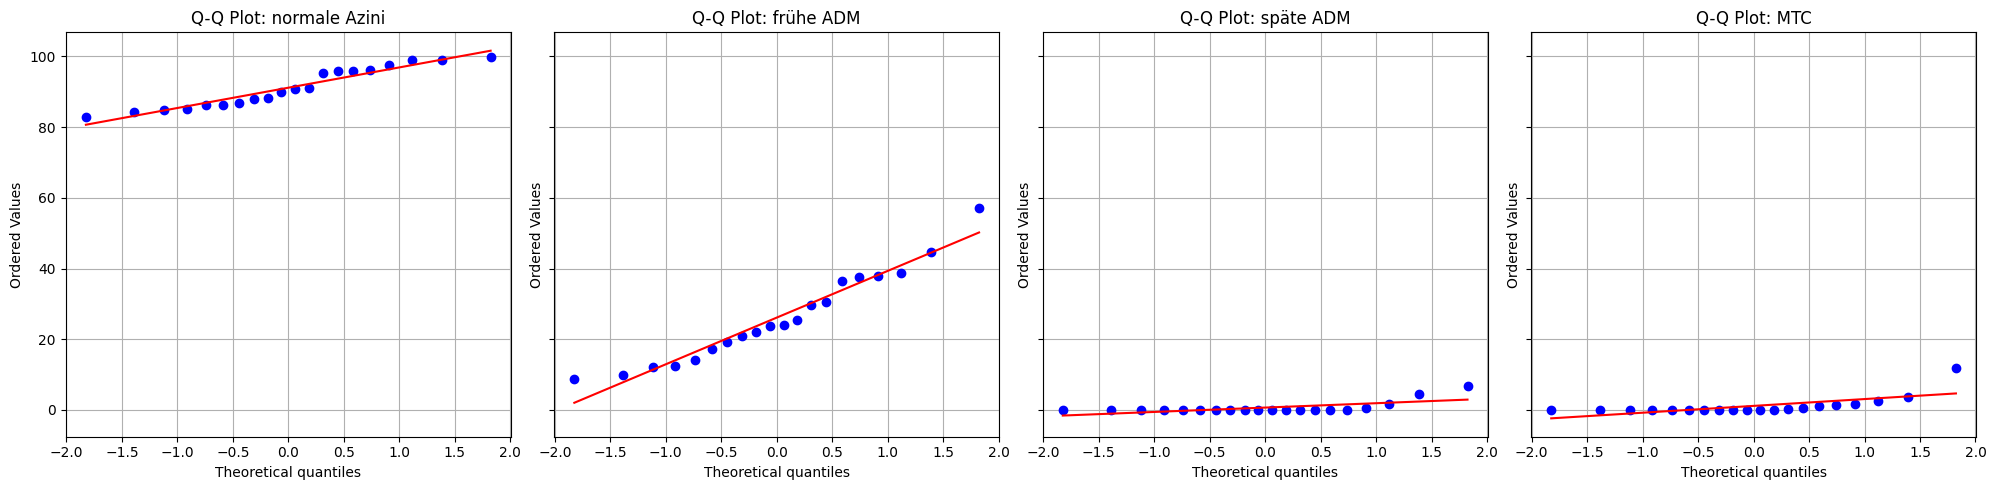

In [10]:
# Plot settings
groups = cldn10["pathological annotation"].unique()
num_groups = len(groups)
fig, axes = plt.subplots(1, num_groups, figsize=(5 * num_groups, 5), sharey=True)

# Generate a Q-Q plot for each group
for i, group in enumerate(groups):
    group_data = cldn10[cldn10["pathological annotation"] == group]["positive %"]
    stats.probplot(group_data, dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {group}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

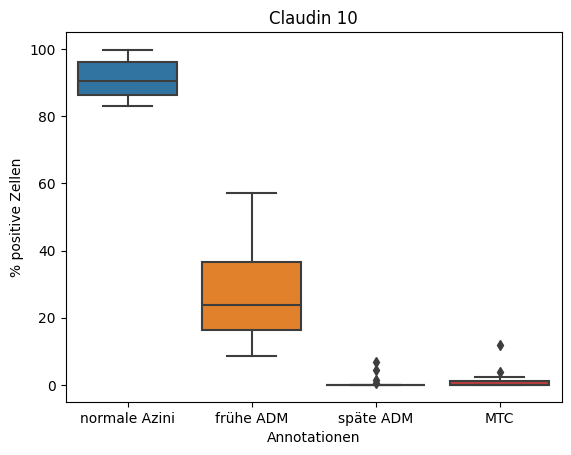

In [20]:
x="pathological annotation"
y="positive %"
order= ["normale Azini", "frühe ADM", "späte ADM", "MTC"]

ax=sns.boxplot(data=cldn10, x=x, y=y, order=order)
ax.set_ylim(-5, 105)
ax.set_ylabel("% positive Zellen")
ax.set_xlabel("Annotationen")

plt.title("Claudin 10")
plt.savefig("./IHC-Quantifizierung/Cldn10_Box_250219.pdf", bbox_inches="tight")
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

normale Azini vs. frühe ADM: t-test independent samples, P_val:2.573e-22 t=2.073e+01
frühe ADM vs. MTC: t-test independent samples, P_val:2.489e-10 t=8.508e+00


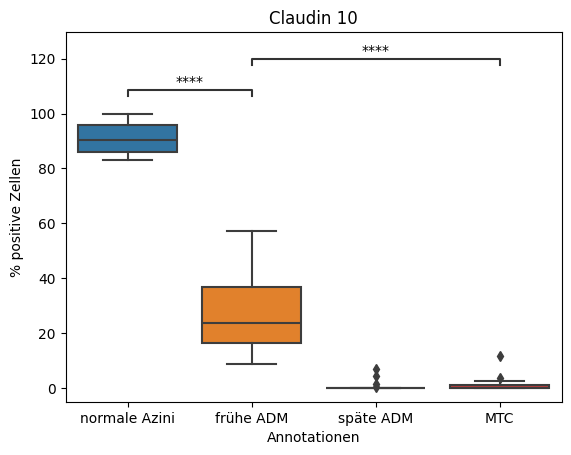

In [15]:
ax = sns.boxplot(data=cldn10, x=x, y=y, order=order)
ax.set_ylim(-5, 105)
ax.set_ylabel("% positive Zellen")
ax.set_xlabel("Annotationen")
annot = Annotator(ax, 
                  [#("normale Azini", "MTC"), 
                   #("normale Azini", "späte ADM"), 
                   ("normale Azini", "frühe ADM"), 
                   ("frühe ADM", "MTC"), 
                   #("frühe ADM", "späte ADM"), 
                   #("späte ADM", "MTC")
                  ], 
                  data=cldn10, x=x, y=y, order=order)
annot.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()

plt.title("Claudin 10")
plt.savefig("./IHC-Quantifizierung/Cldn10_Box_Sign_250219.pdf", bbox_inches="tight")
plt.show()

In [16]:
krt19=df[df["marker"].isin(["Keratin 19"])]
krt19

,marker,image,pathological annotation,positive %
320,Keratin 19,CK19 926895.svs,normale Azini,0.5371
321,Keratin 19,CK19 926895.svs,normale Azini,0.4716
322,Keratin 19,CK19 926895.svs,normale Azini,1.0926
323,Keratin 19,CK19 926895.svs,normale Azini,0.4089
324,Keratin 19,CK19 926895.svs,normale Azini,0.8974
...,...,...,...,...
395,Keratin 19,CK19 926983.svs,MTC,89.5485
396,Keratin 19,CK19 926983.svs,MTC,86.4620
397,Keratin 19,CK19 926983.svs,MTC,85.8809
398,Keratin 19,CK19 926983.svs,MTC,82.6196


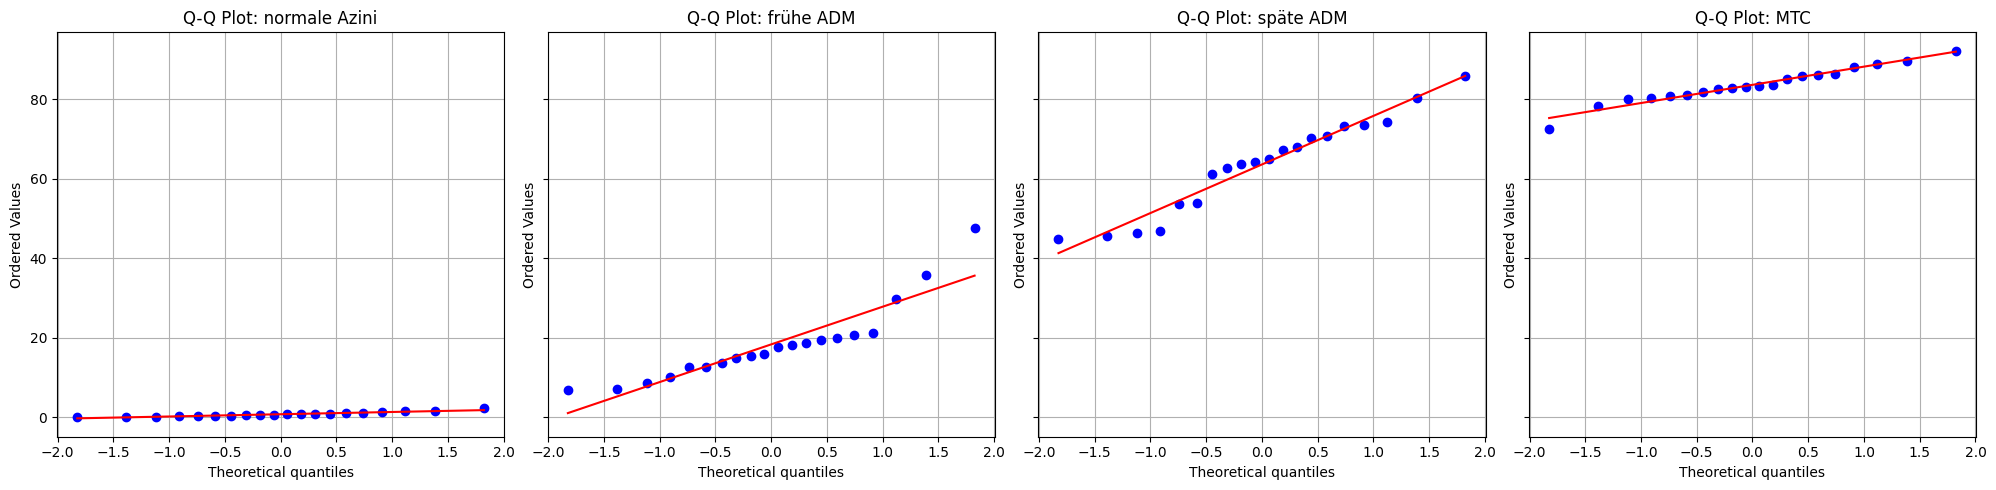

In [17]:
# Plot settings
groups = krt19["pathological annotation"].unique()
num_groups = len(groups)
fig, axes = plt.subplots(1, num_groups, figsize=(5 * num_groups, 5), sharey=True)

# Generate a Q-Q plot for each group
for i, group in enumerate(groups):
    group_data = krt19[krt19["pathological annotation"] == group]["positive %"]
    stats.probplot(group_data, dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {group}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

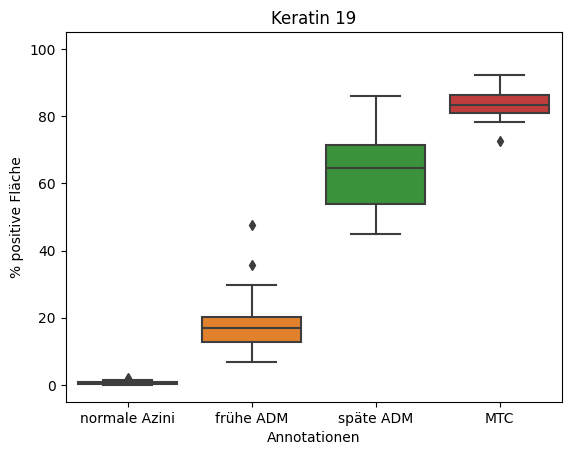

In [19]:
x="pathological annotation"
y="positive %"
order= ["normale Azini", "frühe ADM", "späte ADM", "MTC"]

ax=sns.boxplot(data=krt19, x=x, y=y, order=order)
ax.set_ylim(-5, 105)
ax.set_ylabel("% positive Fläche")
ax.set_xlabel("Annotationen")

plt.title("Keratin 19")
plt.savefig("./IHC-Quantifizierung/Krt19_Box_250219.pdf", bbox_inches="tight")
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

normale Azini vs. frühe ADM: t-test independent samples, P_val:1.250e-09 t=-7.969e+00
frühe ADM vs. späte ADM: t-test independent samples, P_val:1.030e-15 t=-1.314e+01
späte ADM vs. MTC: t-test independent samples, P_val:1.833e-08 t=-7.094e+00


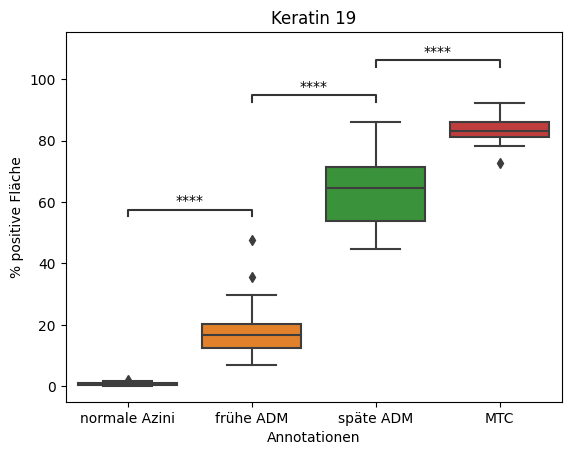

In [21]:
ax = sns.boxplot(data=krt19, x=x, y=y, order=order)
ax.set_ylim(-5, 105)
ax.set_ylabel("% positive Fläche")
ax.set_xlabel("Annotationen")
annot = Annotator(ax, 
                  [#("normale Azini", "MTC"), 
                   #("normale Azini", "späte ADM"), 
                   ("normale Azini", "frühe ADM"), 
                   #("frühe ADM", "MTC"), 
                   ("frühe ADM", "späte ADM"), 
                   ("späte ADM", "MTC")
                  ], 
                  data=krt19, x=x, y=y, order=order)
annot.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()

plt.title("Keratin 19")
plt.savefig("./IHC-Quantifizierung/Krt19_Box_Sign_250219.pdf", bbox_inches="tight")
plt.show()

In [22]:
msln=df[df["marker"].isin(["Mesothelin"])]
msln

,marker,image,pathological annotation,positive %
80,Mesothelin,Mesothelin 38032.svs,normale Azini,0.0000
81,Mesothelin,Mesothelin 38032.svs,normale Azini,0.3110
82,Mesothelin,Mesothelin 38032.svs,normale Azini,0.0000
83,Mesothelin,Mesothelin 38032.svs,normale Azini,0.6639
84,Mesothelin,Mesothelin 926895.svs,normale Azini,0.2920
...,...,...,...,...
155,Mesothelin,Mesothelin 926991.svs,späte ADM,22.5400
156,Mesothelin,Mesothelin 926991.svs,MTC,2.1740
157,Mesothelin,Mesothelin 926991.svs,MTC,3.1750
158,Mesothelin,Mesothelin 926991.svs,MTC,4.9770


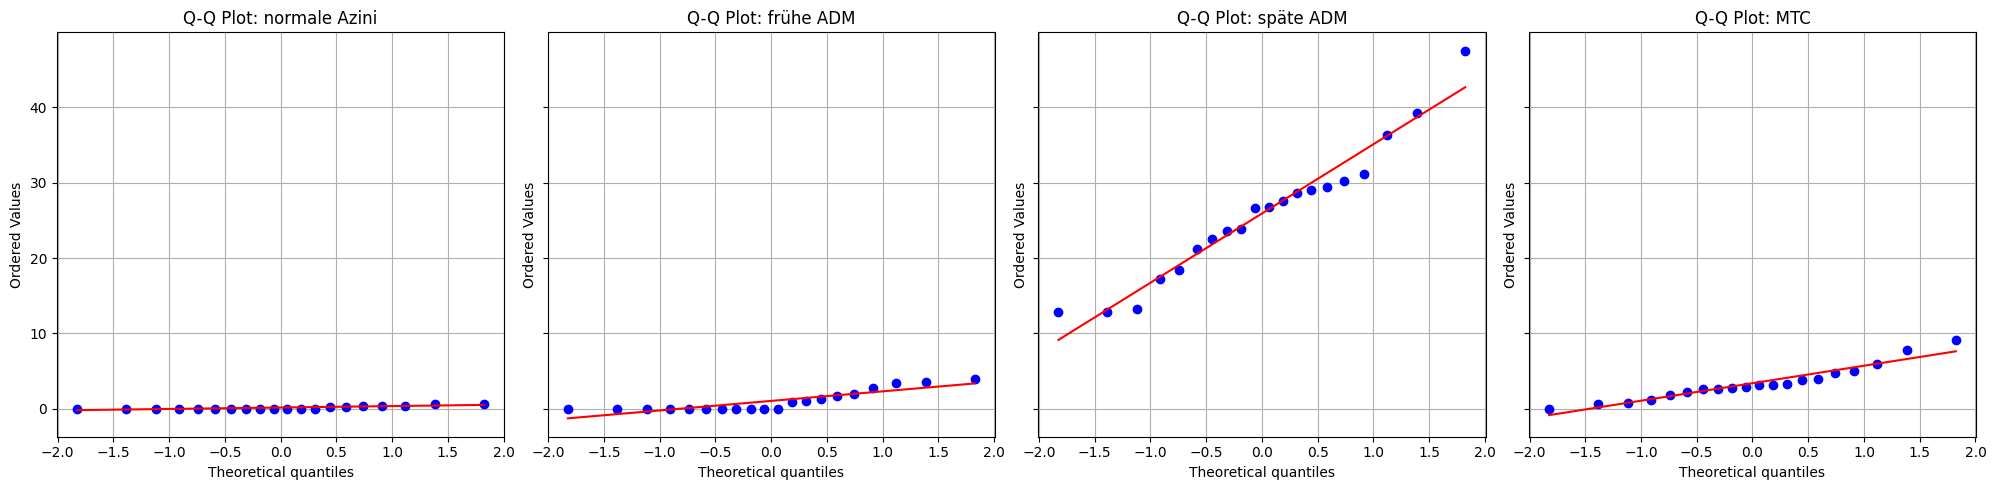

In [23]:
# Plot settings
groups = msln["pathological annotation"].unique()
num_groups = len(groups)
fig, axes = plt.subplots(1, num_groups, figsize=(5 * num_groups, 5), sharey=True)

# Generate a Q-Q plot for each group
for i, group in enumerate(groups):
    group_data = msln[msln["pathological annotation"] == group]["positive %"]
    stats.probplot(group_data, dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {group}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

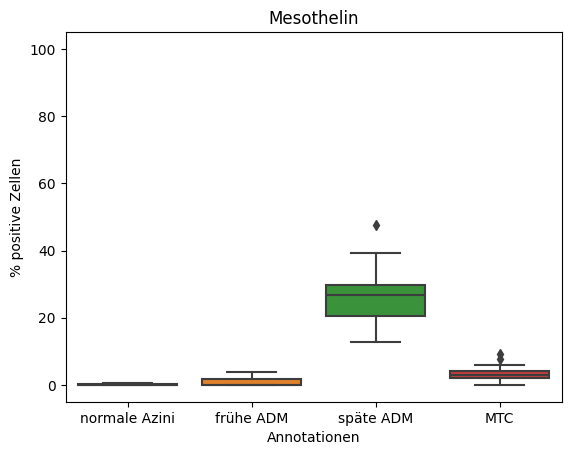

In [24]:
x="pathological annotation"
y="positive %"
order= ["normale Azini", "frühe ADM", "späte ADM", "MTC"]

ax=sns.boxplot(data=msln, x=x, y=y, order=order)
ax.set_ylim(-5, 105)
ax.set_ylabel("% positive Zellen")
ax.set_xlabel("Annotationen")

plt.title("Mesothelin")
plt.savefig("./IHC-Quantifizierung/Msln_Box_250219.pdf", bbox_inches="tight")
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

frühe ADM vs. späte ADM: t-test independent samples, P_val:7.728e-15 t=-1.232e+01
späte ADM vs. MTC: t-test independent samples, P_val:2.720e-13 t=1.093e+01


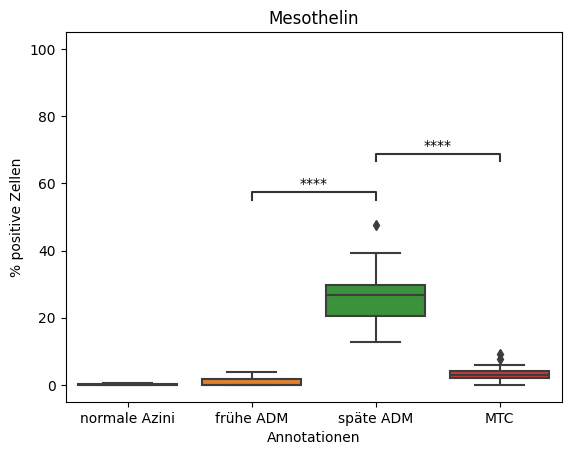

In [25]:
ax = sns.boxplot(data=msln, x=x, y=y, order=order)
ax.set_ylim(-5, 105)
ax.set_ylabel("% positive Zellen")
ax.set_xlabel("Annotationen")
annot = Annotator(ax, 
                  [#("normale Azini", "MTC"), 
                   #("normale Azini", "späte ADM"), 
                   #("normale Azini", "frühe ADM"), 
                   #("frühe ADM", "MTC"), 
                   ("frühe ADM", "späte ADM"), 
                   ("späte ADM", "MTC")
                  ], 
                  data=msln, x=x, y=y, order=order)
annot.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()

plt.title("Mesothelin")
plt.savefig("./IHC-Quantifizierung/Msln_Box_Sign_250219.pdf", bbox_inches="tight")
plt.show()

In [26]:
amy=df[df["marker"].isin(["Amylase"])]
amy

,marker,image,pathological annotation,positive %
240,Amylase,Amylase 926895.svs,normale Azini,99.9000
241,Amylase,Amylase 926895.svs,normale Azini,99.7000
242,Amylase,Amylase 926895.svs,normale Azini,99.8200
243,Amylase,Amylase 926895.svs,normale Azini,99.8900
244,Amylase,Amylase 926895.svs,normale Azini,99.9200
...,...,...,...,...
315,Amylase,Amylase 926983.svs,MTC,0.0000
316,Amylase,Amylase 926983.svs,MTC,0.9509
317,Amylase,Amylase 926983.svs,MTC,2.7910
318,Amylase,Amylase 926983.svs,MTC,2.0490


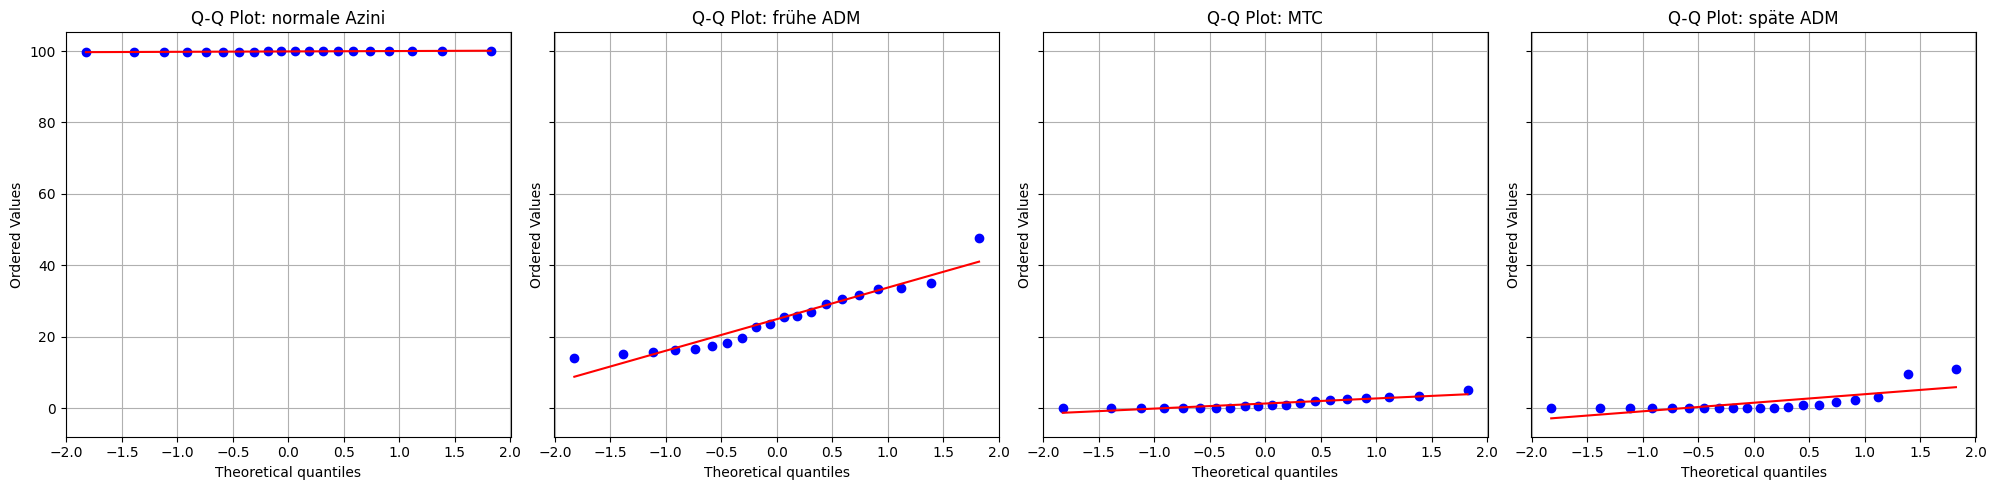

In [27]:
# Plot settings
groups = amy["pathological annotation"].unique()
num_groups = len(groups)
fig, axes = plt.subplots(1, num_groups, figsize=(5 * num_groups, 5), sharey=True)

# Generate a Q-Q plot for each group
for i, group in enumerate(groups):
    group_data = amy[amy["pathological annotation"] == group]["positive %"]
    stats.probplot(group_data, dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {group}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

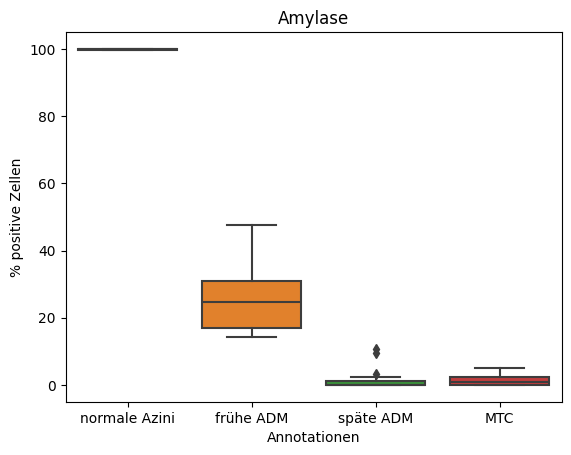

In [28]:
x="pathological annotation"
y="positive %"
order= ["normale Azini", "frühe ADM", "späte ADM", "MTC"]

ax=sns.boxplot(data=amy, x=x, y=y, order=order)
ax.set_ylim(-5, 105)
ax.set_ylabel("% positive Zellen")
ax.set_xlabel("Annotationen")

plt.title("Amylase")
plt.savefig("./IHC-Quantifizierung/Amy_Box_250219.pdf", bbox_inches="tight")
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

normale Azini vs. frühe ADM: t-test independent samples, P_val:5.077e-32 t=3.842e+01
frühe ADM vs. späte ADM: t-test independent samples, P_val:1.037e-13 t=1.130e+01


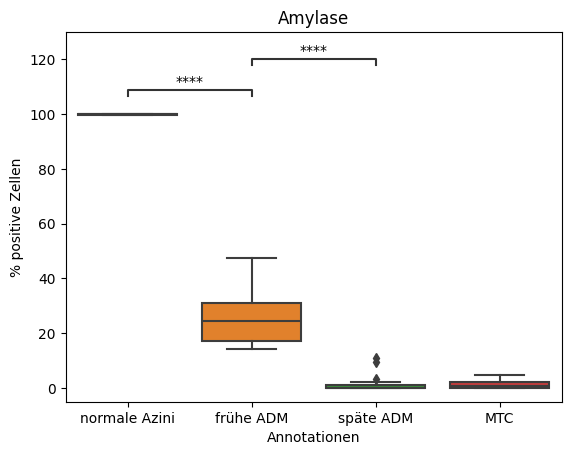

In [30]:
ax = sns.boxplot(data=amy, x=x, y=y, order=order)
ax.set_ylim(-5, 105)
ax.set_ylabel("% positive Zellen")
ax.set_xlabel("Annotationen")
annot = Annotator(ax, 
                  [#("normale Azini", "MTC"), 
                   #("normale Azini", "späte ADM"), 
                   ("normale Azini", "frühe ADM"), 
                   #("frühe ADM", "MTC"), 
                   ("frühe ADM", "späte ADM"), 
                   #("späte ADM", "MTC")
                  ], 
                  data=amy, x=x, y=y, order=order)
annot.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()

plt.title("Amylase")
plt.savefig("./IHC-Quantifizierung/Amy_Box_Sign_250219.pdf", bbox_inches="tight")
plt.show()